In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import voxart

In [3]:
test_vox2 = voxart.Design.from_size(7)
for i in [0, 6]:
    test_vox2.vox[i, 0, :] = 1
    test_vox2.vox[i, 6, :] = 1
    test_vox2.vox[i, :, 0] = 1
    test_vox2.vox[i, :, 6] = 1
for i in [6]:
    test_vox2.vox[0, i, :] = 1
    test_vox2.vox[6, i, :] = 1
    test_vox2.vox[:, i, 0] = 1
    test_vox2.vox[:, i, 6] = 1
display(test_vox2.vox.sum())
test_vox2._vox

58

array([[[1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],


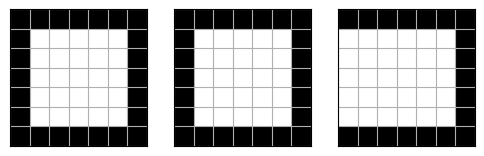

In [4]:
test_vox2.projections_fig()

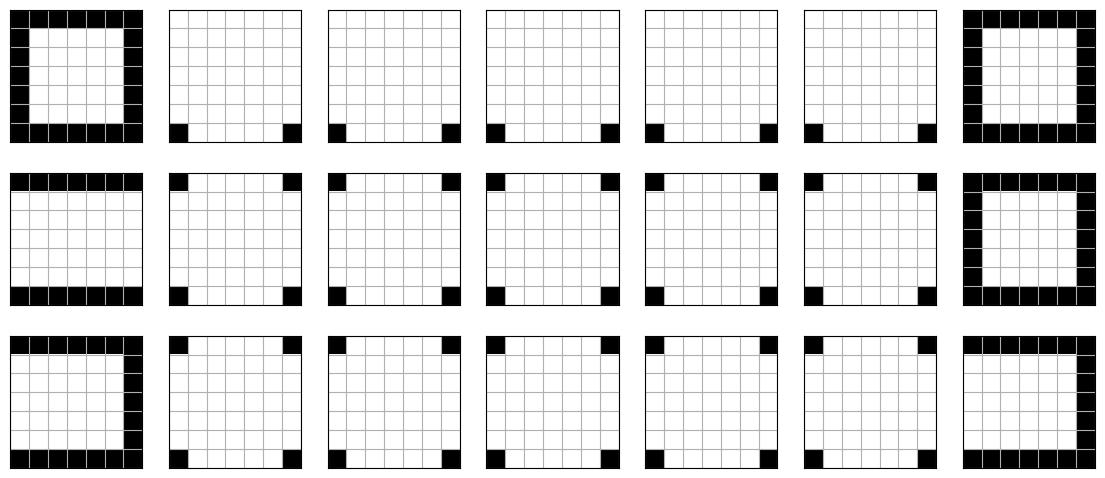

In [5]:
test_vox2.slices_fig()

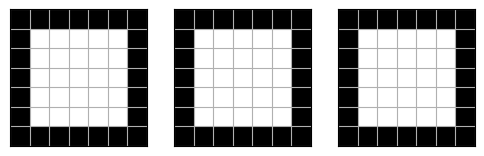

In [6]:
g = voxart.Goal.from_size(7)
g.add_frame()
g.fig()

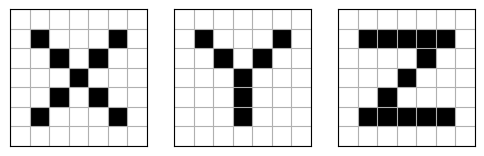

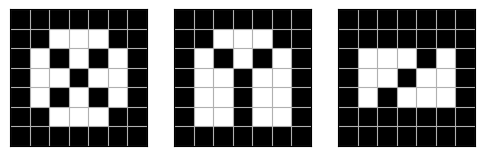

In [7]:
test_goal = voxart.Goal.from_arrays(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
)
display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())

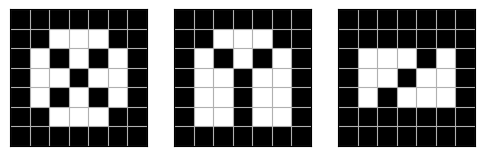

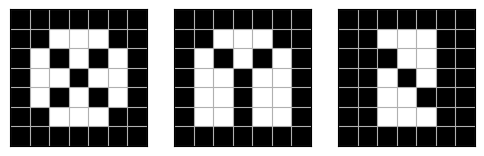

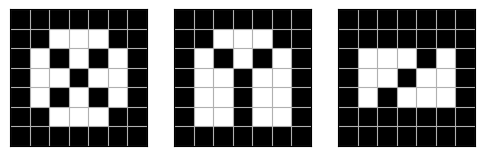

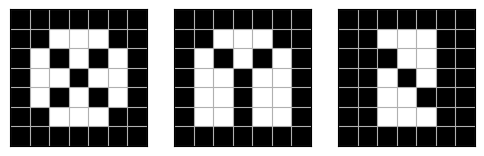

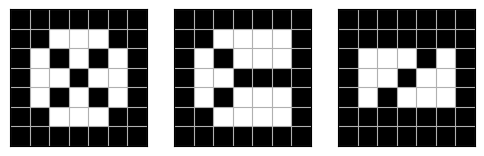

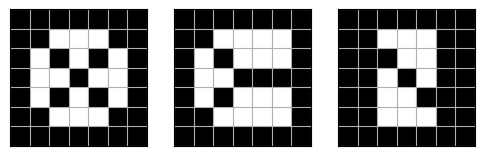

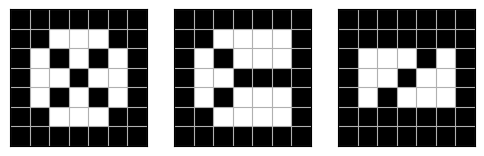

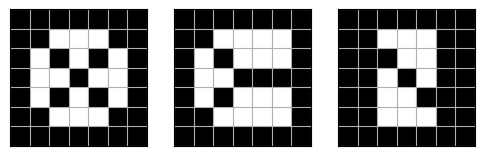

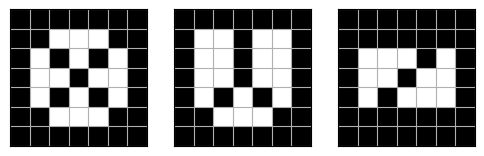

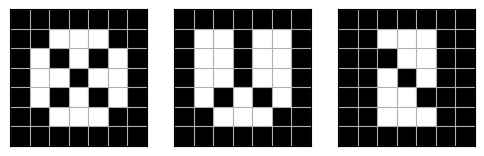

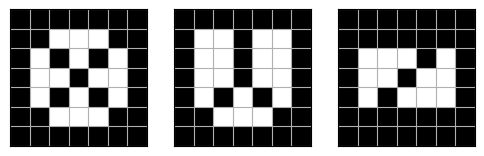

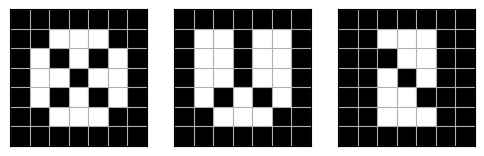

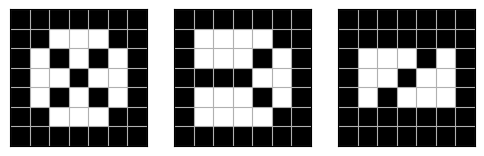

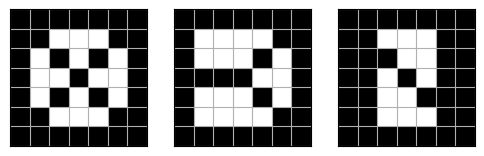

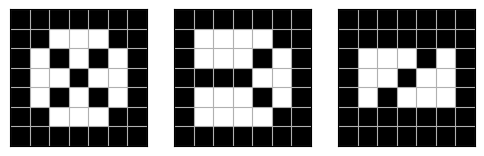

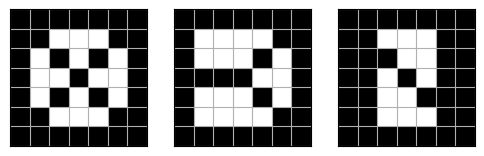

In [8]:
for g in test_goal.rotations():
    display(g.fig())

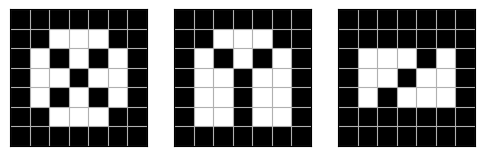

134

In [9]:
design = test_goal.create_base_design()
display(design.projections_fig())
display(design.vox.sum())

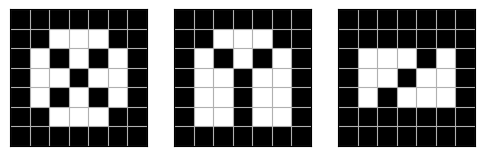

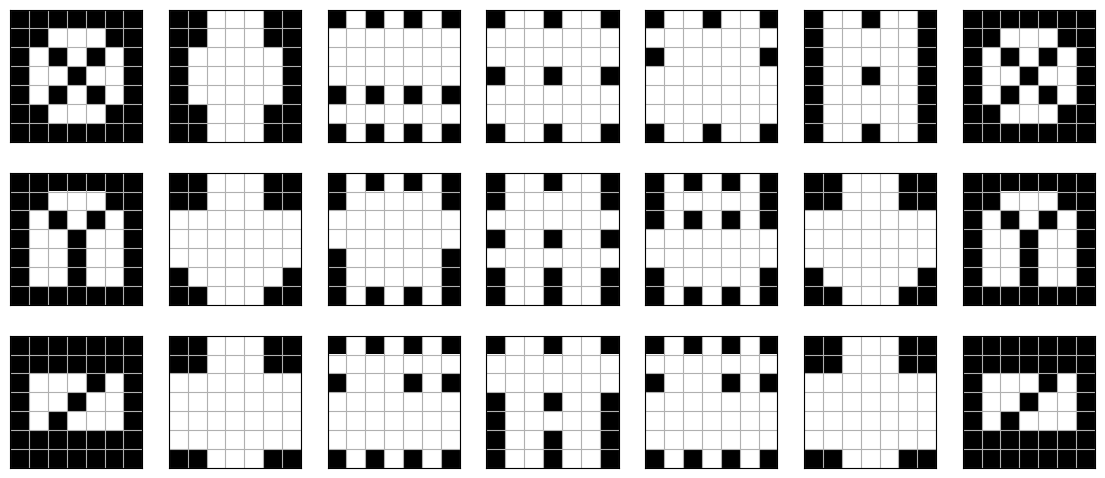

In [10]:
y, z = np.where(test_goal._goals[0] == 0)
design.vox[:, y, z] = 0
x, z = np.where(test_goal._goals[1] == 0)
design.vox[x, :, z] = 0
x, y = np.where(test_goal._goals[2] == 0)
design.vox[x, y, :] = 0
display(design.projections_fig())
display(design.slices_fig())

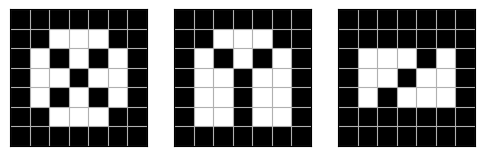

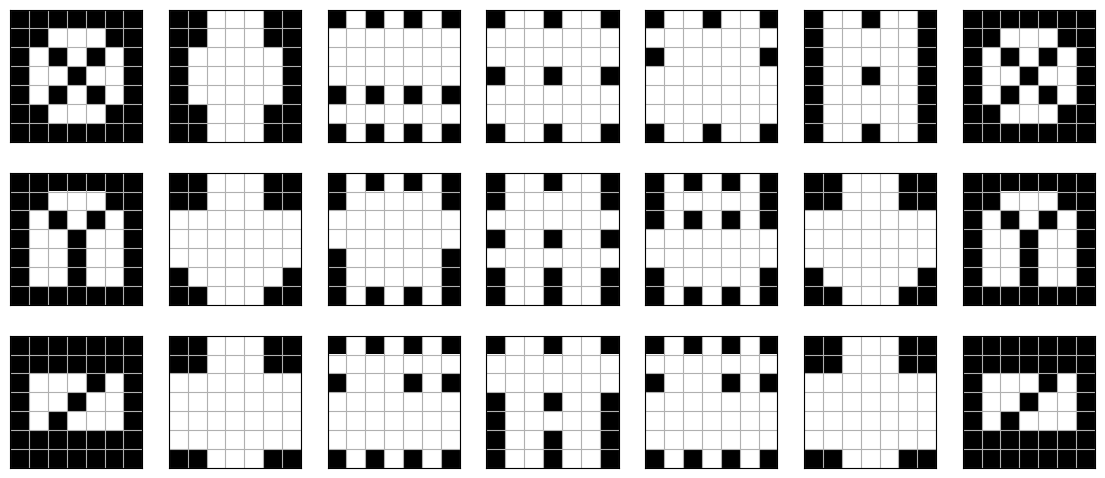

134

In [11]:
design2 = test_goal.create_base_design()
display(design2.projections_fig())
display(design2.slices_fig())
display(design2.vox.sum())

In [12]:
voxart.Masks(4)

## find_removable

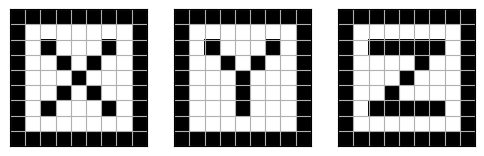

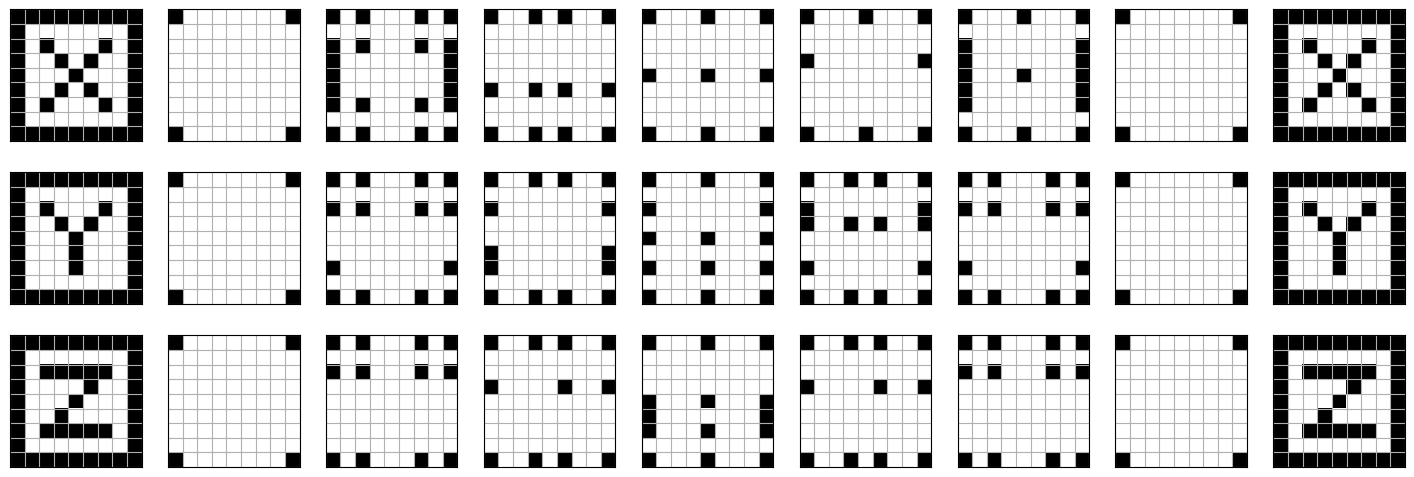

In [13]:
test_goal = voxart.Goal.from_arrays(
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0)
)
#display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())
design = test_goal.create_base_design()
display(design.slices_fig())

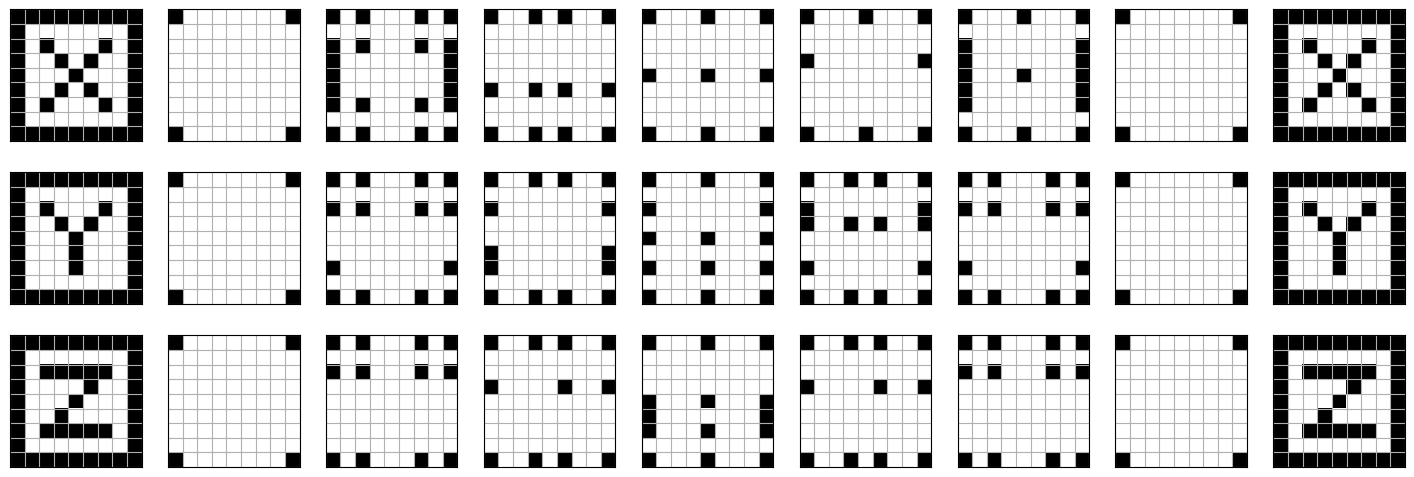

In [14]:
voxart.Design(design.find_removable_slow()).slices_fig()

## Search

Starting objective value: 153.0


(array([ 4.,  9., 14.,  9., 20., 24.,  5.,  9.,  4.,  2.]),
 array([37. , 39.9, 42.8, 45.7, 48.6, 51.5, 54.4, 57.3, 60.2, 63.1, 66. ]),
 <BarContainer object of 10 artists>)

Value: 37.0


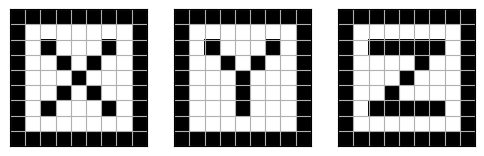

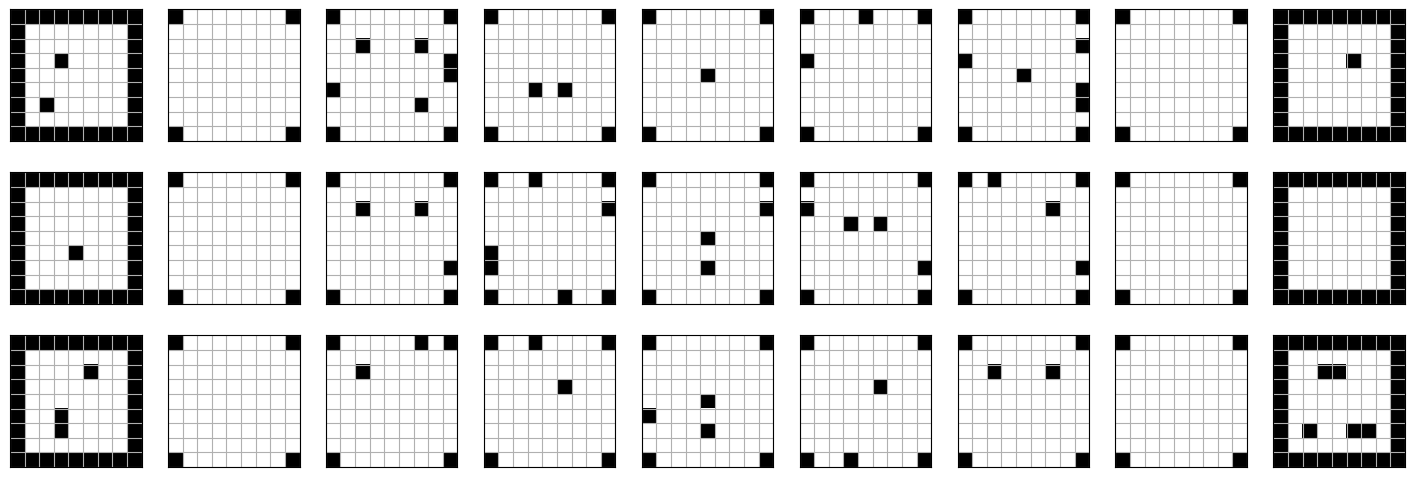

Value: 38.5


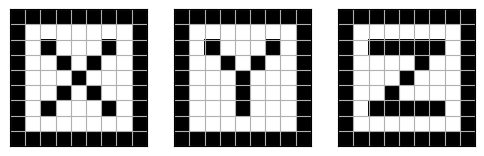

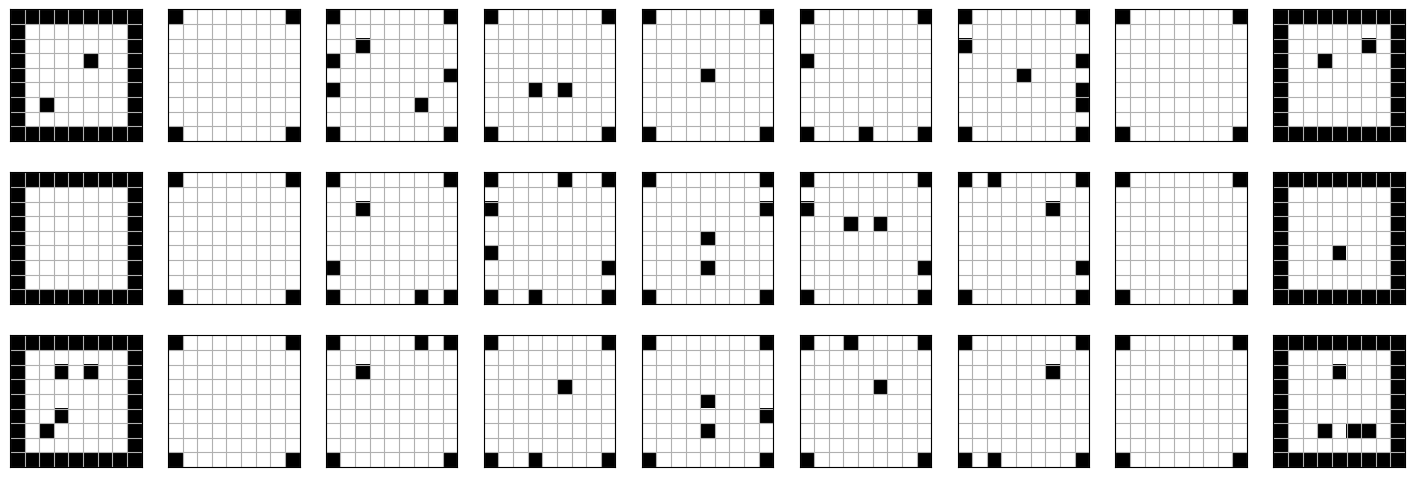

Value: 38.5


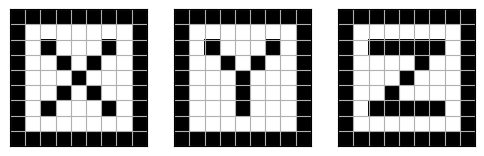

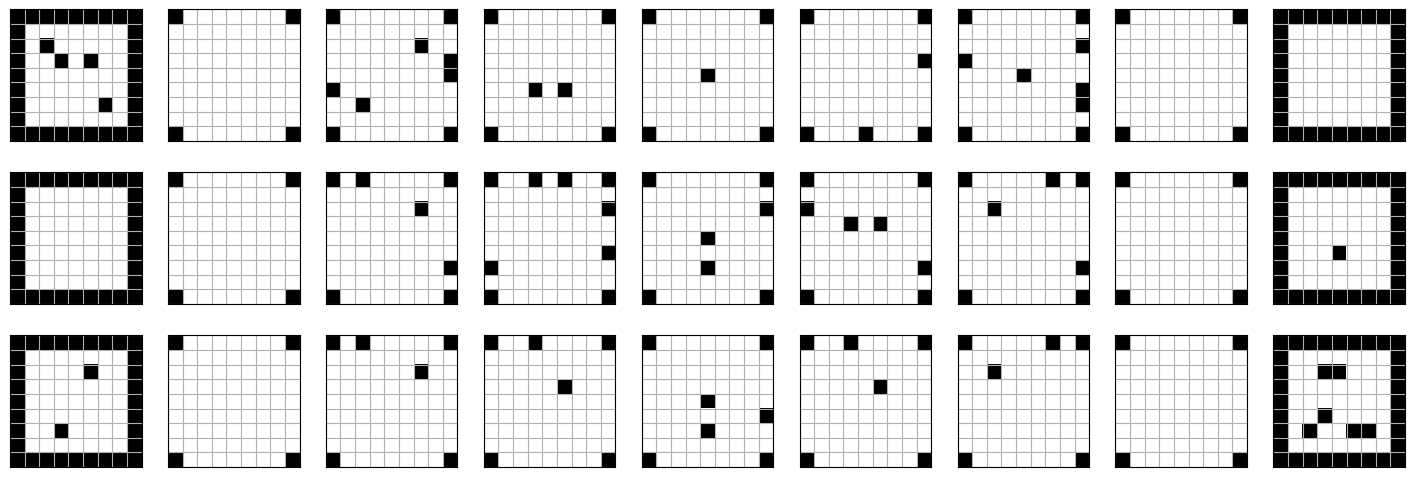

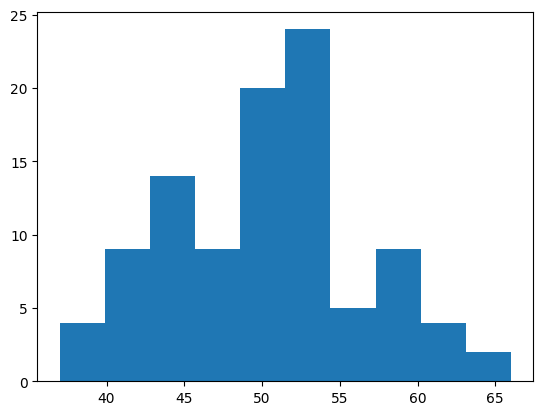

In [15]:
base_design = test_goal.create_base_design()
masks = voxart.Masks(base_design.size)
print("Starting objective value:", voxart.objective_value(base_design, masks))
results = voxart.search(test_goal, voxart.SearchStrategy.RANDOM, 100, 3)
display(plt.hist(results.all_objective_values()))
for design in results.best():
    print("Value:", voxart.objective_value(design, masks))
    display(design.projections_fig())
    display(design.slices_fig())

Starting objective value: 153.0


(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([35. , 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36. ]),
 <BarContainer object of 10 artists>)

Value: 35.5


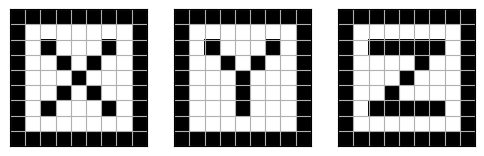

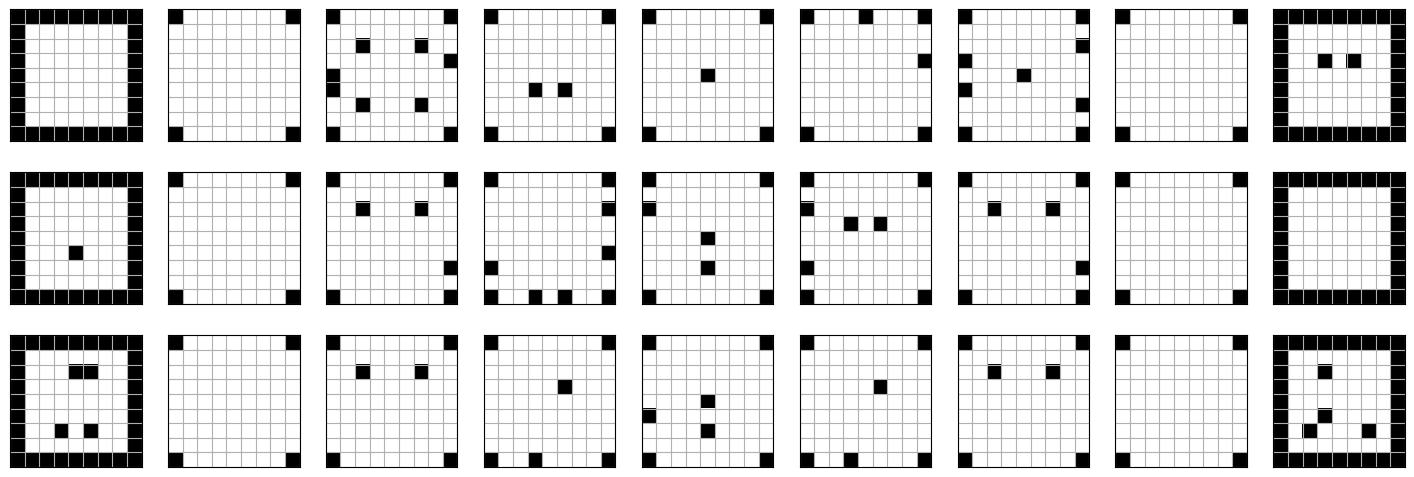

Value: 35.5


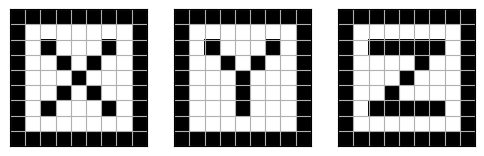

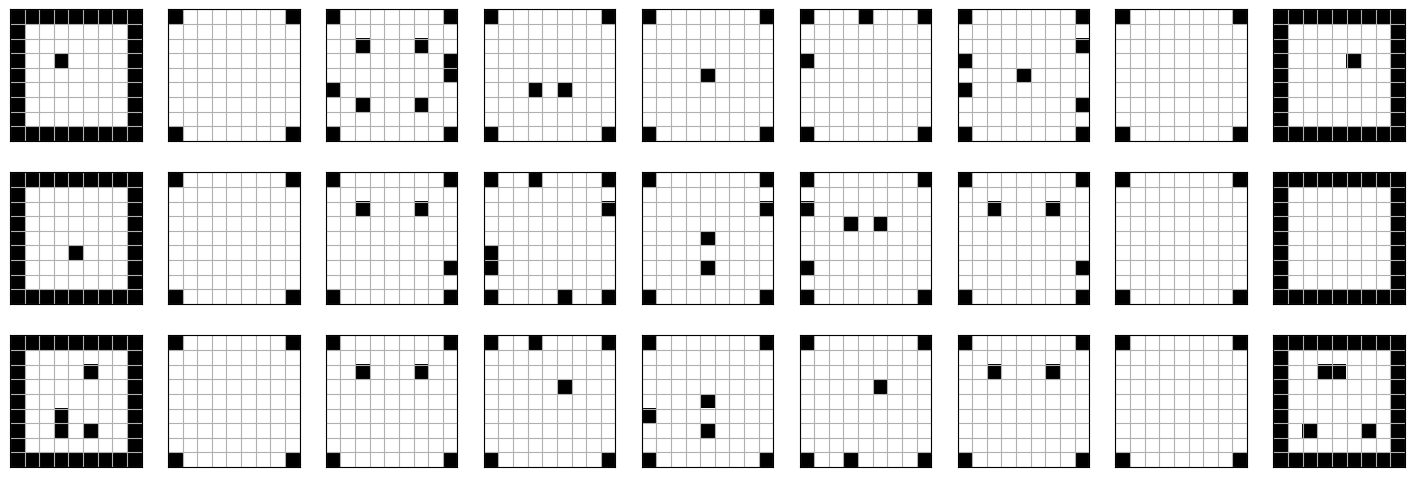

Value: 35.5


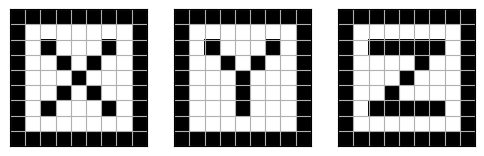

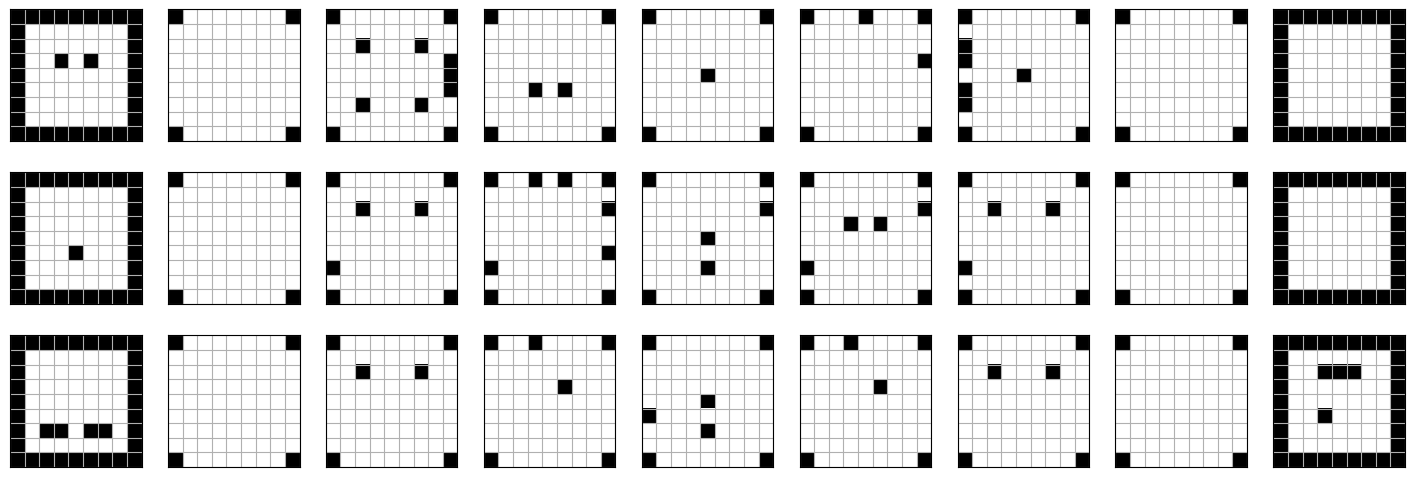

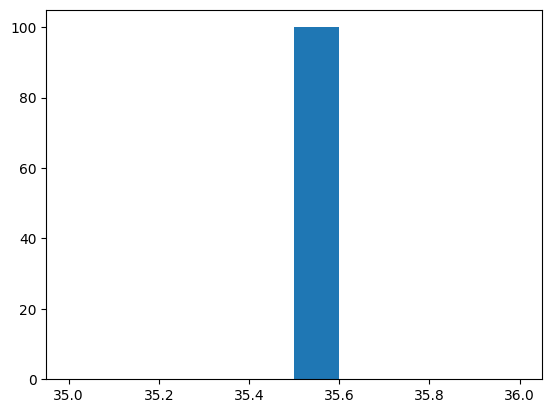

In [16]:
base_design = test_goal.create_base_design()
masks = voxart.Masks(base_design.size)
print("Starting objective value:", voxart.objective_value(base_design, masks))
results = voxart.search(test_goal, voxart.SearchStrategy.RANDOM_FACE_FIRST, 100, 3)
display(plt.hist(results.all_objective_values()))
for design in results.best():
    print("Value:", voxart.objective_value(design, masks))
    display(design.projections_fig())
    display(design.slices_fig())

In [17]:
dir(voxart)

['Callable',
 'Design',
 'Goal',
 'Iterator',
 'Masks',
 'Optional',
 'SearchResults',
 'SearchResultsEntry',
 'SearchStrategy',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'annotations',
 'copy',
 'dataclass',
 'enum',
 'field',
 'functools',
 'heapq',
 'itertools',
 'np',
 'objective_value',
 'pd',
 'plt',
 'search']

In [18]:
%reload_ext autoreload

In [19]:
%pdb 0

Automatic pdb calling has been turned OFF
